***Millicheckers***


Dataset: Life Expectancy

**Problem 1**

**Lecture Requirement**



**Purpose of the dataset:**

The goal of the dataset is to show how different factors affect the life expectancy of different populations in 193 countries using data from the same WHO data repository website. This dataset will also show which countries have the highest life expectancy and how long a certain population lives. Because the effects of immunization and the human development index were not taken into account in the past, this dataset additionally addresses factors impacting life expectancy, taking demographic demographics, income composition, and mortality rates into consideration. So this dataset will help the researchers in what they should do to give more value to the life expectancy of different people in different aspect of life

**Needs statement:**

In today's massive population arount the world a lot of things can contribute or effect the life expectancy of every country. By 

**Significance of the dataset:**

The study's significance is that it focuses on immunization factors, mortality factors, economic factors, social factors, and other health-related factors, and this dataset will aid researchers in providing data or creating a study that can identify the predicting factor that contributes to a lower life expectancy value. This dataset will assist in identifying countries that should be prioritized in order to effectively enhance the population's life expectancy.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv('/content/Life_Expectancy_Data.csv')
df

Country  Year  ... Income composition of resources  Schooling
0     Afghanistan  2015  ...                           0.479       10.1
1     Afghanistan  2014  ...                           0.476       10.0
2     Afghanistan  2013  ...                           0.470        9.9
3     Afghanistan  2012  ...                           0.463        9.8
4     Afghanistan  2011  ...                           0.454        9.5
...           ...   ...  ...                             ...        ...
2933     Zimbabwe  2004  ...                           0.407        9.2
2934     Zimbabwe  2003  ...                           0.418        9.5
2935     Zimbabwe  2002  ...                           0.427       10.0
2936     Zimbabwe  2001  ...                           0.427        9.8
2937     Zimbabwe  2000  ...                           0.434        9.8

[2938 rows x 22 columns]

**Data Exploration**:

In [49]:
df.shape

(2938, 22)

In [50]:
df.head()

Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

In [51]:
df.tail()

Country  Year  ... Income composition of resources  Schooling
2933  Zimbabwe  2004  ...                           0.407        9.2
2934  Zimbabwe  2003  ...                           0.418        9.5
2935  Zimbabwe  2002  ...                           0.427       10.0
2936  Zimbabwe  2001  ...                           0.427        9.8
2937  Zimbabwe  2000  ...                           0.434        9.8

[5 rows x 22 columns]

In [52]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [53]:
df['Country'].value_counts()

Gambia                   16
Ghana                    16
Belgium                  16
Costa Rica               16
Mali                     16
                         ..
Saint Kitts and Nevis     1
Cook Islands              1
Nauru                     1
Monaco                    1
Niue                      1
Name: Country, Length: 193, dtype: int64

**Data Cleaning:**

In [54]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [55]:
df = df.dropna()

In [56]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**Data Visualization:**


In [57]:
country = df.groupby('Country')
Ph = country.get_group('Philippines')
Ch = country.get_group('China')
Mal = country.get_group('Malaysia')

In [58]:
Ph_group = Ph.groupby('Year')

In [59]:
life_expectancy=df['Life_expectancy'].tolist()
year=df['Year'].tolist()
bmi=df[' BMI '].tolist()

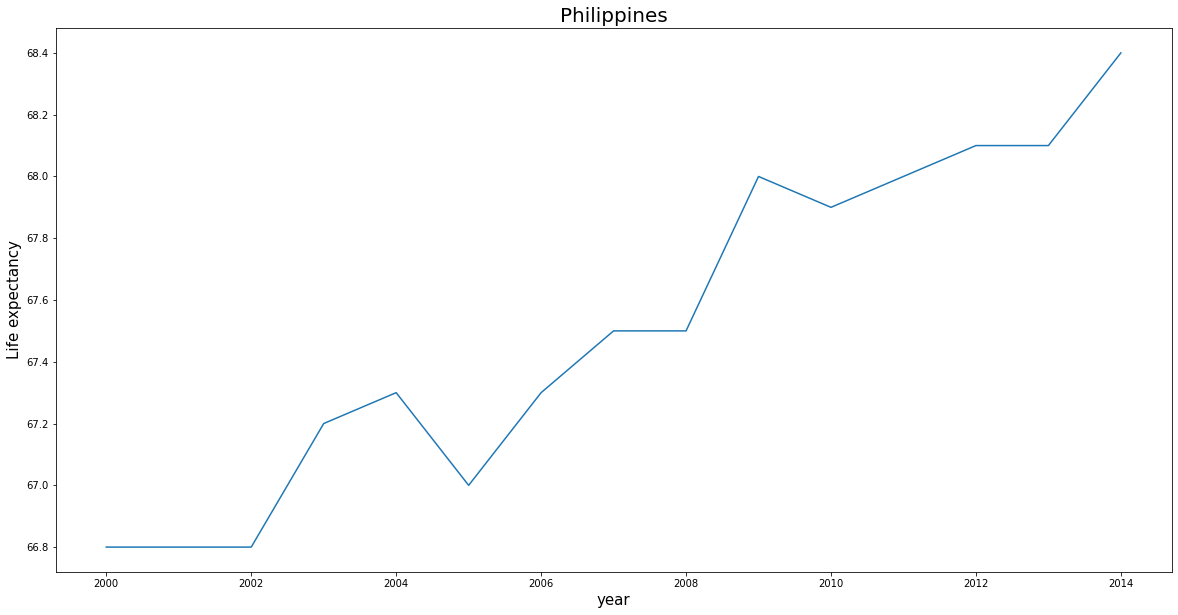

In [60]:
plt.figure(figsize=(20,10))
plt.title('Philippines',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('Life expectancy',fontsize=15)
plt.plot(Ph.Year,Ph.Life_expectancy)

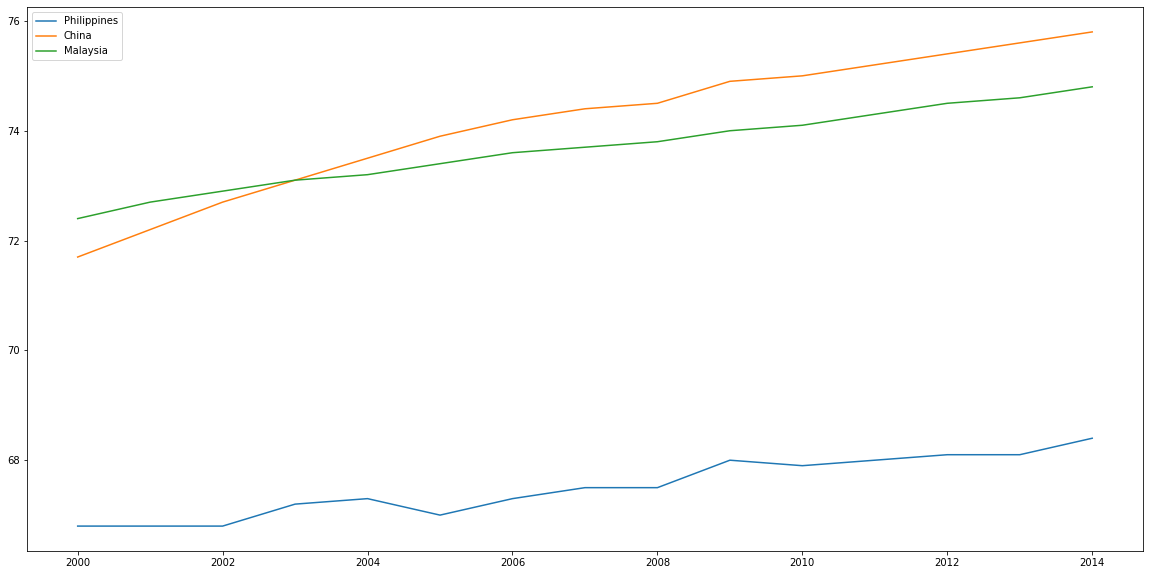

In [61]:
plt.figure(figsize=(20, 10))
plt.plot(Ph.Year, Ph.Life_expectancy, label = "Philippines")
plt.plot(Ph.Year, Ch.Life_expectancy, label = "China")
plt.plot(Ph.Year, Mal.Life_expectancy, label = "Malaysia")
plt.legend()
plt.show()

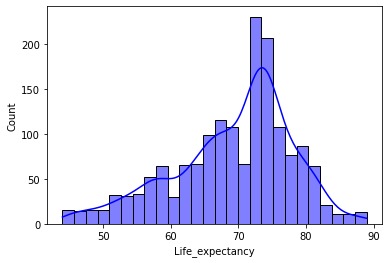

In [62]:
sns.histplot(df['Life_expectancy'].dropna(), kde=True, color='blue')

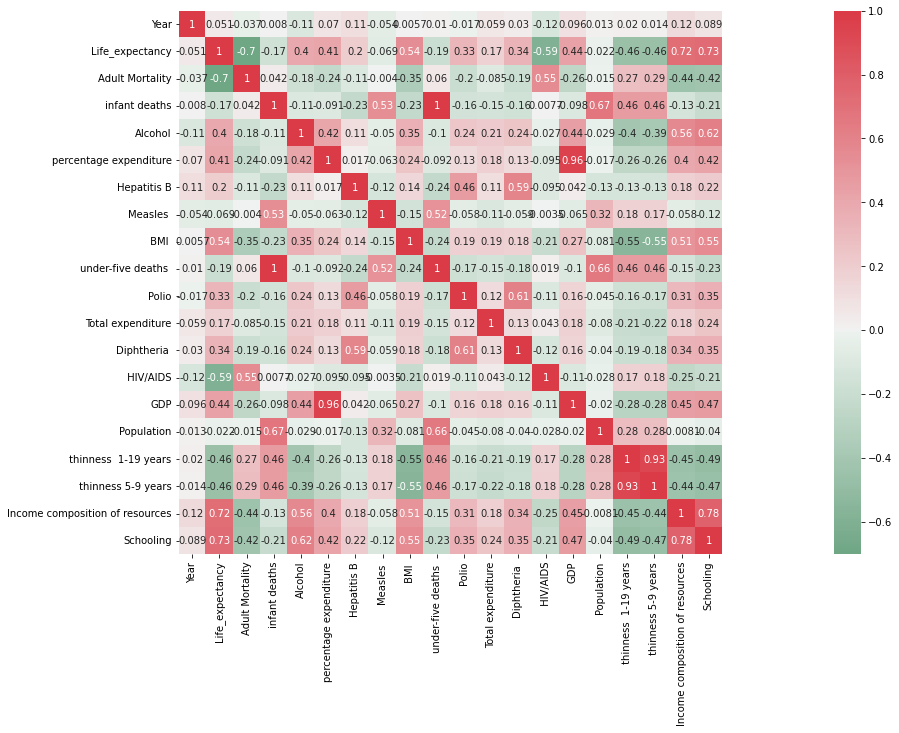

In [63]:
plt.figure(figsize=(40, 10))
cmap = sns.diverging_palette(500,10, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap, center=0, annot=True, square=True);

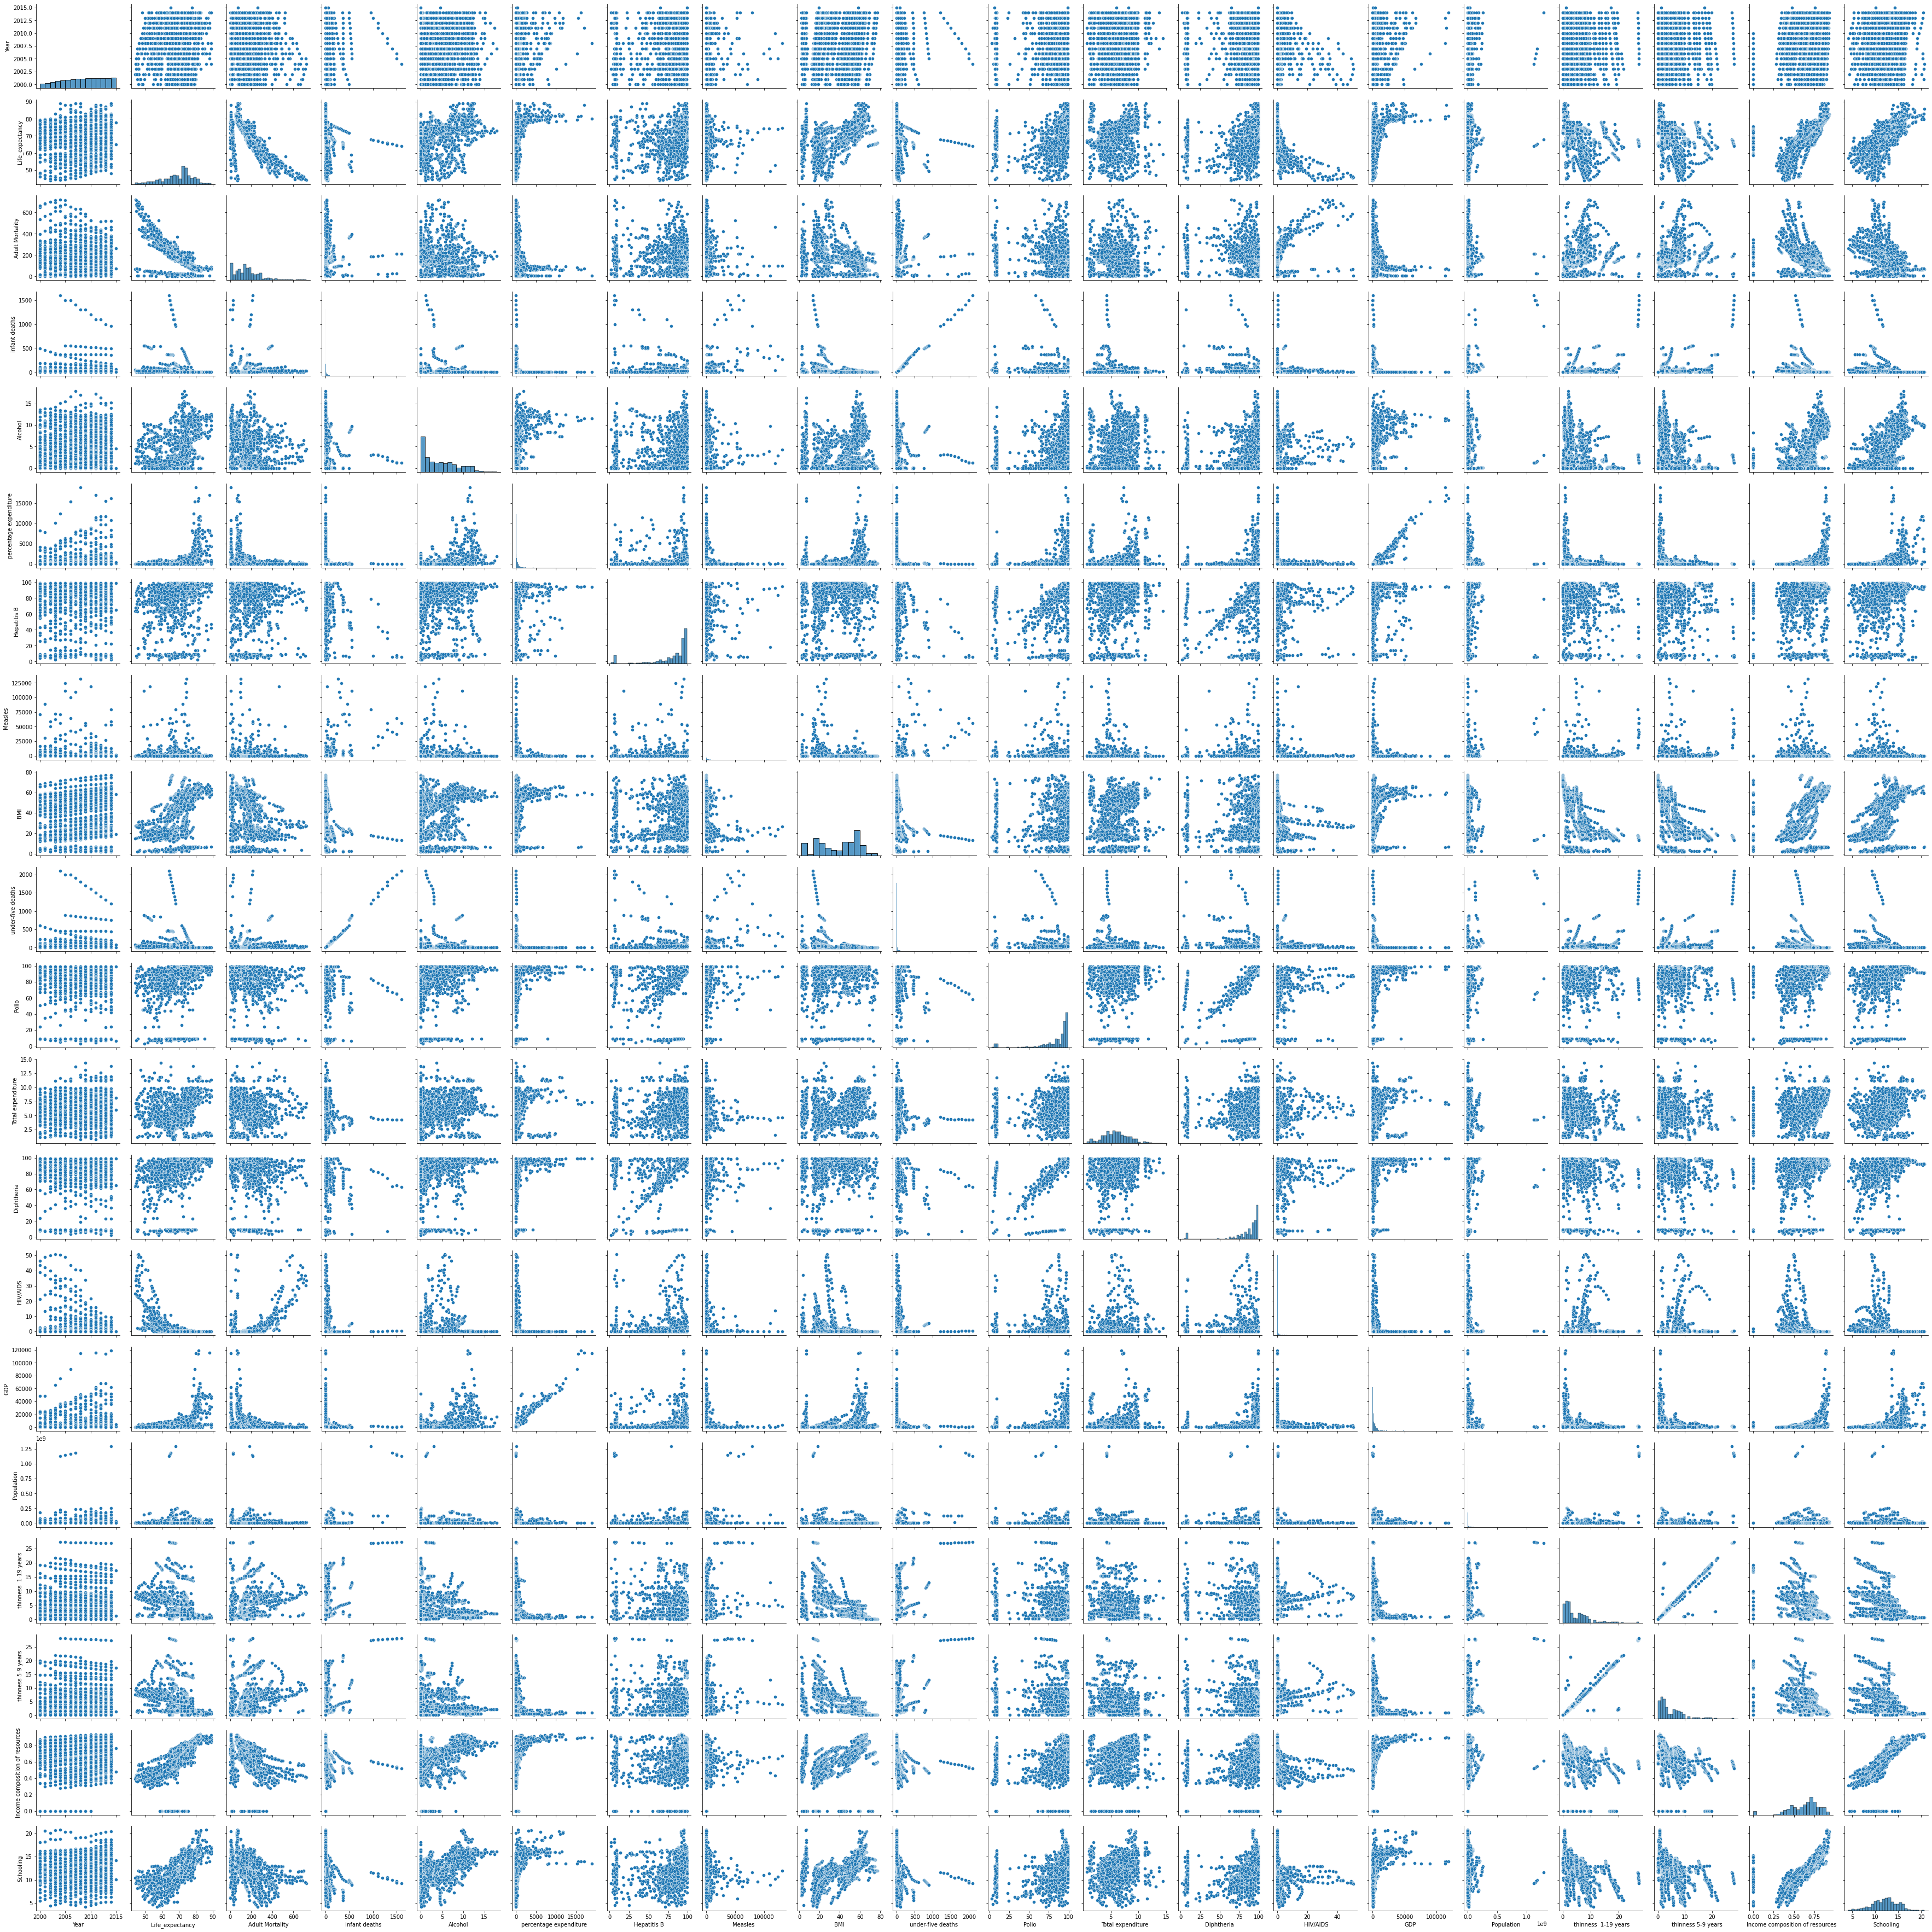

In [64]:
sns.pairplot(df)
plt.show()

**Problem 2**


**Machine Learning Algorithm Used:**

Linear Regression

By fitting a linear equation to observed data, linear regression seeks to model the connection between two variables. One variable is regarded as an explanatory variable, while the other is regarded as a dependent variable. for one example is where we can use linear regression model is to match the relationship between people's weight to their height [1].

**1. Linear regression analysis study (Kumari & Yadav 2018)**

A statistical approach for estimating the value of a dependent variable from an independent variable is linear regression. The relationship between two variables is measured using linear regression. It is a modeling approach in which one or more independent variables are used to predict a dependent variable. The most extensively used statistical approach is linear regression analysis. This article teaches the fundamental ideas and how to use SPSS and Excel to perform linear regression calculations [2].

A linear regression line has an equation of the form ***Y = a + bX*** 

where **X** is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept [1]

Linear Regression


In [65]:
X = df["Life_expectancy"]
y = df[" BMI "]


In [66]:
X1 = X - X.mean()
y1 = y - y.mean()
cov = np.mean(X1*y1)
Std_X = np.std(X1)
Std_y = np.std(y1)
corr = cov / (Std_X*Std_y)
corr

0.5420415876915784

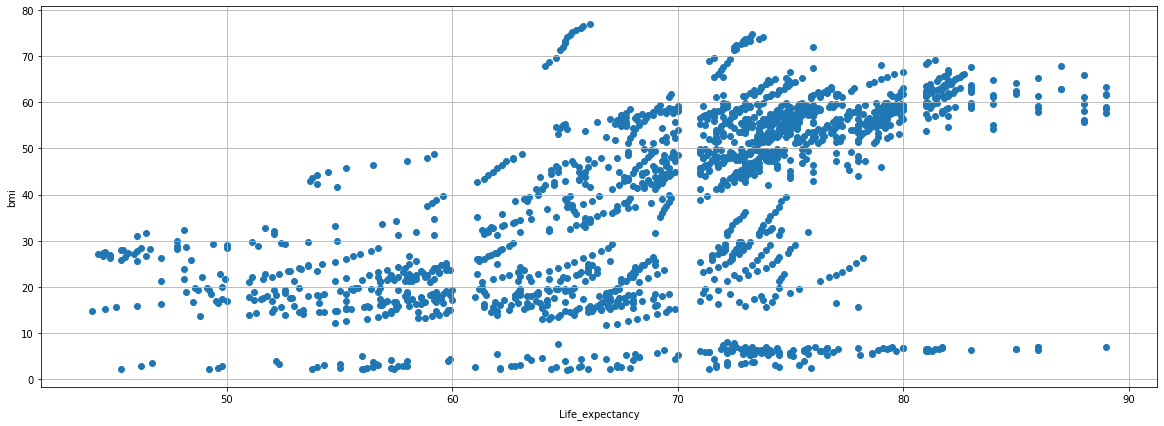

In [67]:
plt.figure(figsize=(20, 7))
plt.scatter(life_expectancy, bmi)
plt.ylabel("bmi")
plt.xlabel("Life_expectancy")
plt.grid()
plt.show()

In [68]:
x = df.drop(columns=['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], axis=1)
y = df[' BMI ']
x.head()

Life_expectancy
0             65.0
1             59.9
2             59.9
3             59.5
4             59.2

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [70]:
y_test

1210     2.5
2273    55.1
1005    57.1
2926    29.9
518     19.8
        ... 
1619    23.2
1532    58.4
51      21.5
2431    62.9
911     52.2
Name:  BMI , Length: 825, dtype: float64

In [71]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(x_train,y_train)

LinearRegression()

In [72]:
y_prediction =  LR.predict(x_test)
y_prediction

array([36.27595992, 43.67793246, 49.90498873, 21.47201485, 14.07004231,
       15.71492509, 37.68585946, 44.03040735, 47.32017292, 42.03304968,
       45.08783199, 45.32281525, 50.96241338, 40.38816689, 34.39609388,
       37.92084271, 47.6726478 , 61.53665986, 49.43502222, 44.73535711,
       61.53665986, 41.44559154, 37.4508762 , 49.08254733, 29.69642878,
       36.27595992, 41.79806642, 49.67000547, 52.37231291, 42.9729827 ,
       23.70435577, 25.1142553 , 41.79806642, 53.42973755, 54.4871622 ,
       49.67000547, 24.64428879, 26.28917158, 43.09047433, 46.61522315,
       24.05683065, 46.26274827, 42.62050782, 43.44294921, 50.72743012,
       24.40930554, 44.97034037, 38.03833434, 44.50037386, 44.50037386,
       32.28124459, 29.3439539 , 20.53208183, 43.67793246, 42.73799944,
       29.93141203, 48.73007245, 44.2653906 , 44.38288223, 32.04626133,
       20.76706508, 22.88191438, 34.51358551, 45.44030688, 43.79542409,
       45.55779851, 25.58422181, 44.85284874, 50.60993849, 47.43

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_prediction)
print('r^2 score: ',score)
print('MSE: ',mean_squared_error(y_test,y_prediction))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_prediction)))

r^2 score:  0.3155536000439163
MSE:  270.1711948476541
RMSE:  16.436885192993657


Problem 3: 

Meme: 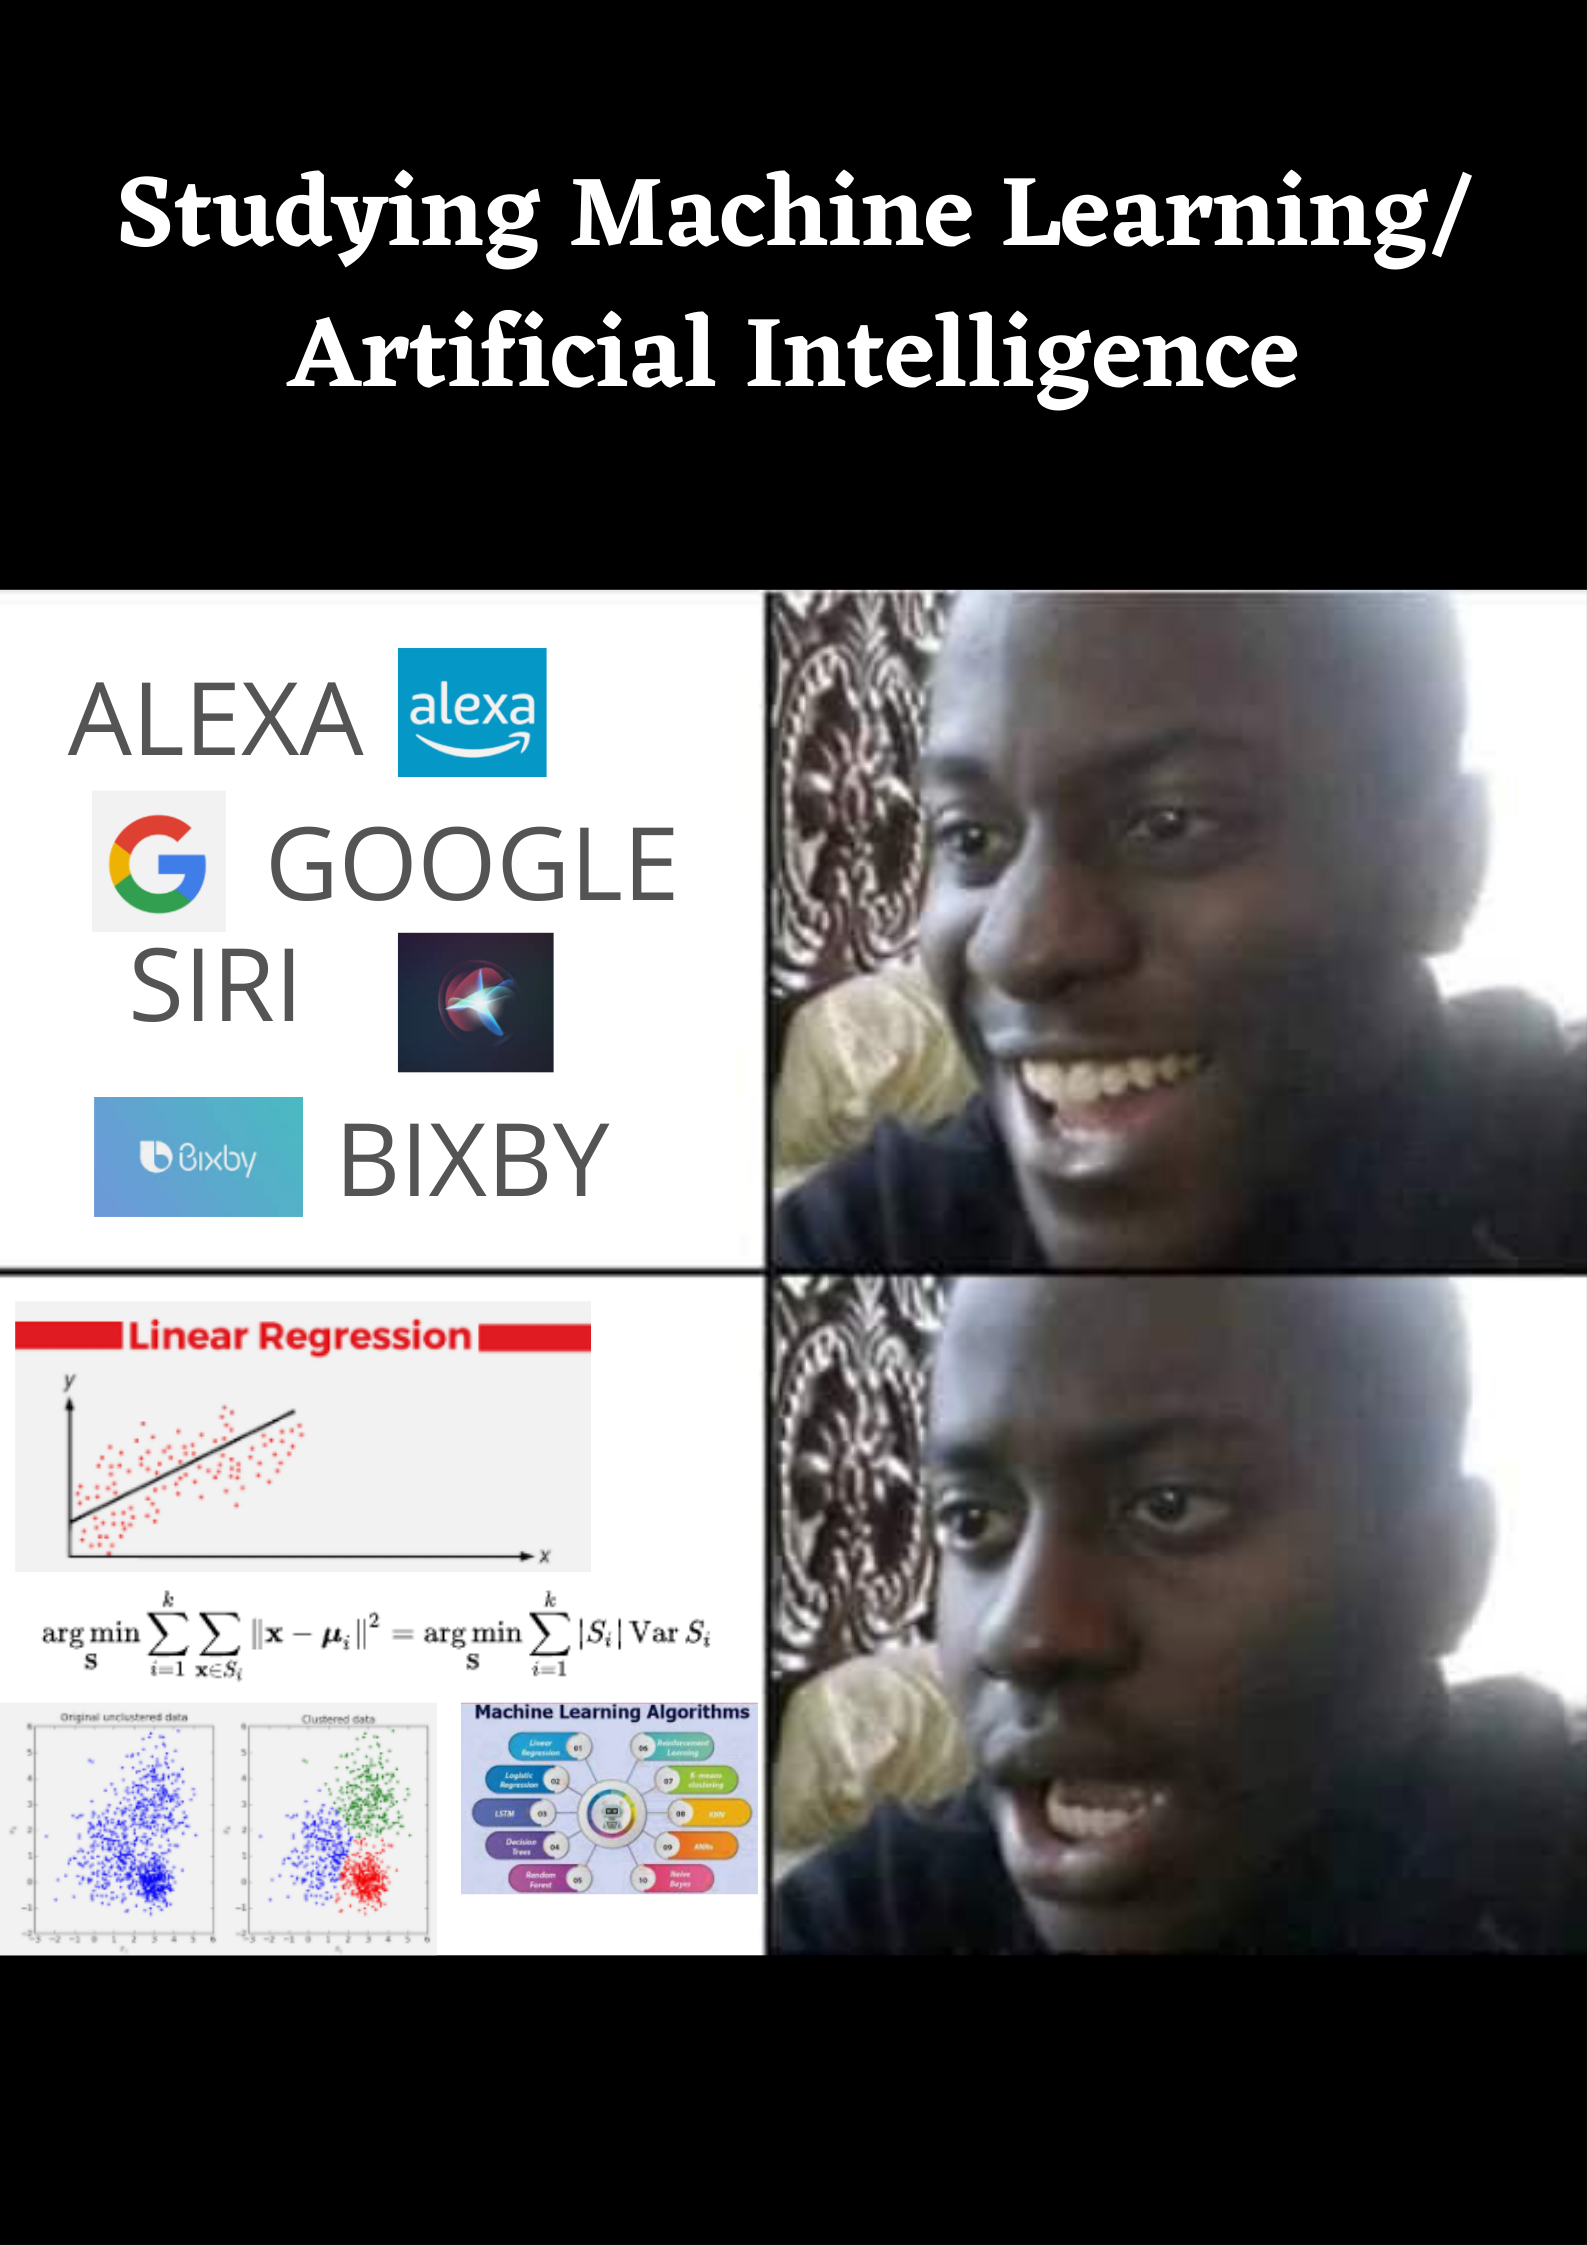

The meme is about reactions of students studying the machine learning before knowing what is behind the machine learning and AI and after knowing what is behind, which are linear regresion, Different algorithms like machine learning algorithm and many more. 


**References:**

[1]"Linear Regression", yale.[Online].Available:http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm [Accessed:14-Nov.-2021]

[2] K. Kumari and S. Yadav, "Linear regression analysis study", Jan. 2018.[Online].Available: https://www.researchgate.net/publication/324944461_Linear_regression_analysis_study [Accessed:14-Nov.-2021]*italicised text*

[3] S. Gupta, "Life Expectancy Prediction Using Linear Regression".[Online].Available: https://www.enjoyalgorithms.com/blog/life-expectancy-prediction-using-linear-regression [Accessed:14-Nov.-2021]